# EEG dataset training file

## Preprocessing

The data are provided here in EDF+ format (containing 64 EEG signals, each sampled at 160 samples per second, and an annotation channel)

The .event files and the annotation channels in the corresponding .edf files contain identical data

In [ ]:
pip install pyedflib

     |████████████████████████████████| 1.2MB 5.4MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pyedflib: filename=pyEDFlib-0.1.19-cp36-cp36m-linux_x86_64.whl size=925702 sha256=517ff284608fc7ec6772bfc510cd992899e7001e5c2f95020f34624353eeb58b
  Stored in directory: /root/.cache/pip/wheels/1f/b7/24/a565e4f7471617165f1b040651b52d87ad1885aaf32e02d4f9
Successfully built pyedflib


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
root_path = 'gdrive/MyDrive/ETH_EEGproject/files/' 
root_path = '/content/gdrive/MyDrive/ETH_EEGproject/files'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# test tool

from pyedflib import highlevel
import numpy as np

# write an edf file
signals = np.random.rand(5, 256*300)*200 # 5 minutes of random signal
channel_names = ['ch1', 'ch2', 'ch3', 'ch4', 'ch5']
signal_headers = highlevel.make_signal_headers(channel_names, sample_rate=256)
header = highlevel.make_header(patientname='patient_x', gender='Female')
highlevel.write_edf('edf_file.edf', signals, signal_headers, header)

# read an edf file
signals, signal_headers, header = highlevel.read_edf('edf_file.edf')
print(signal_headers[0]['sample_rate']) # prints 256

# drop a channel from the file or anonymize edf
highlevel.drop_channels('edf_file.edf', to_drop=['ch2', 'ch4'])
highlevel.anonymize_edf('edf_file.edf', new_file='anonymized.edf',
                             to_remove=['patientname', 'birthdate'],
                             new_values=['anonymized', ''])
# check if the two files have the same content
highlevel.compare_edf('edf_file.edf', 'anonymized.edf')

Reading Channels: 100%|██████████| 5/5 [00:00<00:00, 216.21it/s]

256


True

In [ ]:
# load data

from pyedflib import highlevel
import numpy as np

# read an edf file
#signals, signal_headers, header = highlevel.read_edf((root_path + '/S001/' + 'S001R01.edf'))
signals, signal_headers, header = highlevel.read_edf('/content/gdrive/MyDrive/ETH_EEGproject/files/S001/S001R12.edf')
print(signal_headers[0]['sample_rate']) # prints 256


OSError: ignored

## Preprocessing2 - Reading using MNE

### Mount data and setup (must run)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
root_path = 'gdrive/MyDrive/ETH_EEGproject/files/' 
root_path = '/content/gdrive/MyDrive/ETH_EEGproject/files'

Mounted at /content/gdrive


In [ ]:
!pwd

/content


In [ ]:
pip install -U mne

     |████████████████████████████████| 6.8MB 8.7MB/s 


In [ ]:
import os.path as op

import numpy as np
import pandas as pd

import mne
from mne.datasets import fetch_fsaverage

### Example read

In [ ]:
raw = mne.io.read_raw_edf(root_path + '/S001/' + 'S001R10.edf')

Extracting EDF parameters from /content/gdrive/MyDrive/ETH_EEGproject/files/S001/S001R10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [ ]:
raw.load_data()

Reading 0 ... 19999  =      0.000 ...   124.994 secs...


<RawEDF | S001R10.edf, 64 x 20000 (125.0 s), ~9.9 MB, data loaded>

In [ ]:
raw.info

<Info | 7 non-empty values
 bads: []
 ch_names: Fc5., Fc3., Fc1., Fcz., Fc2., Fc4., Fc6., C5.., C3.., C1.., ...
 chs: 64 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 80.0 Hz
 meas_date: 2009-08-12 16:15:00 UTC
 nchan: 64
 projs: []
 sfreq: 160.0 Hz
>

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa
import mne
montage_dir = os.path.join(os.path.dirname(mne.__file__),
                           'channels', 'data', 'montages')
print('\nBUILT-IN MONTAGE FILES')
print('======================')
print(sorted(os.listdir(montage_dir)))


BUILT-IN MONTAGE FILES
['EGI_256.csd', 'GSN-HydroCel-128.sfp', 'GSN-HydroCel-129.sfp', 'GSN-HydroCel-256.sfp', 'GSN-HydroCel-257.sfp', 'GSN-HydroCel-32.sfp', 'GSN-HydroCel-64_1.0.sfp', 'GSN-HydroCel-65_1.0.sfp', 'biosemi128.txt', 'biosemi16.txt', 'biosemi160.txt', 'biosemi256.txt', 'biosemi32.txt', 'biosemi64.txt', 'easycap-M1.txt', 'easycap-M10.txt', 'mgh60.elc', 'mgh70.elc', 'standard_1005.elc', 'standard_1020.elc', 'standard_alphabetic.elc', 'standard_postfixed.elc', 'standard_prefixed.elc', 'standard_primed.elc']


In [ ]:
# change to panda dataframe
df = raw. to_data_frame(picks=None, index=None, scalings=None, copy=True, start=None, stop=None, long_format=False, time_format='ms')
print(df)

         time   Fc5.   Fc3.   Fc1.   Fcz.  ...  Po8.   O1..   Oz..  O2..  Iz..
0           0 -142.0 -128.0 -117.0 -134.0  ... -46.0 -130.0 -101.0 -99.0  56.0
1           6 -119.0 -116.0 -114.0 -139.0  ... -23.0 -119.0  -75.0 -59.0  73.0
2          12 -116.0 -102.0  -94.0 -125.0  ... -29.0 -112.0  -68.0 -42.0  78.0
3          19  -93.0  -89.0  -80.0 -100.0  ... -25.0 -100.0  -66.0 -42.0  84.0
4          25  -91.0  -87.0  -86.0 -105.0  ... -45.0  -94.0  -71.0 -54.0  79.0
...       ...    ...    ...    ...    ...  ...   ...    ...    ...   ...   ...
19995  124969    0.0    0.0    0.0    0.0  ...   0.0    0.0    0.0   0.0   0.0
19996  124975    0.0    0.0    0.0    0.0  ...   0.0    0.0    0.0   0.0   0.0
19997  124981    0.0    0.0    0.0    0.0  ...   0.0    0.0    0.0   0.0   0.0
19998  124988    0.0    0.0    0.0    0.0  ...   0.0    0.0    0.0   0.0   0.0
19999  124994    0.0    0.0    0.0    0.0  ...   0.0    0.0    0.0   0.0   0.0

[20000 rows x 65 columns]


In [ ]:
raw.annotations.save('saved-annotations.csv')
annot_from_file = pd.read_csv('saved-annotations.csv')
print(annot_from_file)
# convert to ms
annot = np.multiply(annot_from_file['duration'],1000)
cum = np.array([])

for i in range(len(annot)):
  cum = np.append(cum, np.sum(annot[0:i+1]))
print(cum)


                      onset  duration description
0   2009-08-12 16:15:00.000       4.2          T0
1   2009-08-12 16:15:04.200       4.1          T1
2   2009-08-12 16:15:08.300       4.2          T0
3   2009-08-12 16:15:12.500       4.1          T2
4   2009-08-12 16:15:16.600       4.2          T0
5   2009-08-12 16:15:20.800       4.1          T2
6   2009-08-12 16:15:24.900       4.2          T0
7   2009-08-12 16:15:29.100       4.1          T1
8   2009-08-12 16:15:33.200       4.2          T0
9   2009-08-12 16:15:37.400       4.1          T2
10  2009-08-12 16:15:41.500       4.2          T0
11  2009-08-12 16:15:45.700       4.1          T1
12  2009-08-12 16:15:49.800       4.2          T0
13  2009-08-12 16:15:54.000       4.1          T1
14  2009-08-12 16:15:58.100       4.2          T0
15  2009-08-12 16:16:02.300       4.1          T2
16  2009-08-12 16:16:06.400       4.2          T0
17  2009-08-12 16:16:10.600       4.1          T2
18  2009-08-12 16:16:14.700       4.2          T0


In [ ]:
cnt = 0;
for i in range(len(cum)):
  while(df.loc[cnt, 'time'] < cum[i]):
    cnt += 1;
    df.loc[cnt-1, 'annotation'] = annot_from_file.loc[i,'description']
#df['annotation'] = df['annotation'].shift(-1)
df

,time,Fc5.,Fc3.,Fc1.,Fcz.,Fc2.,Fc4.,Fc6.,C5..,C3..,C1..,Cz..,C2..,C4..,C6..,Cp5.,Cp3.,Cp1.,Cpz.,Cp2.,Cp4.,Cp6.,Fp1.,Fpz.,Fp2.,Af7.,Af3.,Afz.,Af4.,Af8.,F7..,F5..,F3..,F1..,Fz..,F2..,F4..,F6..,F8..,Ft7.,Ft8.,T7..,T8..,T9..,T10.,Tp7.,Tp8.,P7..,P5..,P3..,P1..,Pz..,P2..,P4..,P6..,P8..,Po7.,Po3.,Poz.,Po4.,Po8.,O1..,Oz..,O2..,Iz..,annotation
0,0,-142.0,-128.0,-117.0,-134.0,-121.0,-94.0,-68.0,-94.0,-135.0,-133.0,-143.0,-87.0,-95.0,-59.0,-122.0,-134.0,-126.0,-116.0,-93.0,-85.0,-48.0,-128.0,-114.0,-105.0,-135.0,-137.0,-100.0,-108.0,-113.0,-115.0,-137.0,-116.0,-106.0,-119.0,-114.0,-131.0,-84.0,-51.0,-97.0,-50.0,-84.0,-35.0,-74.0,-5.0,-98.0,-26.0,-96.0,-109.0,-118.0,-105.0,-90.0,-78.0,-67.0,-48.0,-37.0,-108.0,-118.0,-90.0,-65.0,-46.0,-130.0,-101.0,-99.0,56.0,T0
1,6,-119.0,-116.0,-114.0,-139.0,-125.0,-98.0,-69.0,-68.0,-117.0,-116.0,-133.0,-82.0,-89.0,-61.0,-87.0,-105.0,-103.0,-97.0,-73.0,-65.0,-34.0,-135.0,-121.0,-121.0,-132.0,-132.0,-100.0,-105.0,-117.0,-109.0,-124.0,-109.0,-100.0,-118.0,-114.0,-130.0,-84.0,-54.0,-98.0,-54.0,-98.0,-67.0,-55.0,-20.0,-60.0,-7.0,-67.0,-86.0,-102.0,-89.0,-73.0,-55.0,-46.0,-29.0,-21.0,-96.0,-110.0,-74.0,-38.0,-23.0,-119.0,-75.0,-59.0,73.0,T0
2,12,-116.0,-102.0,-94.0,-125.0,-113.0,-91.0,-67.0,-77.0,-111.0,-108.0,-121.0,-77.0,-87.0,-67.0,-96.0,-108.0,-102.0,-97.0,-78.0,-70.0,-44.0,-142.0,-126.0,-134.0,-136.0,-136.0,-92.0,-97.0,-125.0,-107.0,-122.0,-99.0,-87.0,-100.0,-100.0,-117.0,-67.0,-54.0,-96.0,-53.0,-71.0,-41.0,-36.0,-8.0,-49.0,-27.0,-70.0,-88.0,-108.0,-103.0,-91.0,-68.0,-64.0,-42.0,-33.0,-81.0,-102.0,-83.0,-45.0,-29.0,-112.0,-68.0,-42.0,78.0,T0
3,19,-93.0,-89.0,-80.0,-100.0,-93.0,-79.0,-61.0,-62.0,-101.0,-107.0,-125.0,-73.0,-86.0,-60.0,-90.0,-106.0,-105.0,-107.0,-88.0,-78.0,-44.0,-126.0,-99.0,-100.0,-112.0,-113.0,-70.0,-74.0,-110.0,-83.0,-92.0,-81.0,-69.0,-80.0,-79.0,-96.0,-53.0,-47.0,-89.0,-79.0,-32.0,-21.0,-36.0,6.0,-44.0,-18.0,-54.0,-76.0,-103.0,-104.0,-100.0,-81.0,-73.0,-49.0,-30.0,-67.0,-88.0,-86.0,-51.0,-25.0,-100.0,-66.0,-42.0,84.0,T0
4,25,-91.0,-87.0,-86.0,-105.0,-95.0,-77.0,-52.0,-65.0,-105.0,-120.0,-139.0,-94.0,-95.0,-67.0,-88.0,-115.0,-118.0,-125.0,-108.0,-100.0,-64.0,-109.0,-91.0,-91.0,-110.0,-112.0,-70.0,-84.0,-107.0,-98.0,-97.0,-82.0,-70.0,-85.0,-85.0,-104.0,-68.0,-52.0,-70.0,-74.0,-52.0,-60.0,-48.0,-9.0,-57.0,-33.0,-72.0,-88.0,-115.0,-109.0,-110.0,-96.0,-91.0,-68.0,-48.0,-80.0,-97.0,-91.0,-67.0,-45.0,-94.0,-71.0,-54.0,79.0,T0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,124969,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
19996,124975,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
19997,124981,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
19998,124988,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


### Read all files and count number of classes

In [ ]:
raw = mne.io.read_raw_edf(root_path + '/S001/' + 'S001R10.edf')
# change to panda dataframe
df = raw. to_data_frame(picks=None, index=None, scalings=None, copy=True, start=None, stop=None, long_format=False, time_format='ms')
 raw.annotations.save('saved-annotations.csv')
annot_from_file = pd.read_csv('saved-annotations.csv')
print(annot_from_file)
# convert to ms
annot = np.multiply(annot_from_file['duration'],1000)
cum = np.array([])

for i in range(len(annot)):
  cum = np.append(cum, np.sum(annot[0:i+1]))

cnt = 0;
for i in range(len(cum)):
  while(df.loc[cnt, 'time'] < cum[i]):
    cnt += 1;
    df.loc[cnt-1, 'annotation'] = annot_from_file.loc[i,'description']

In [ ]:
subjects = np.arange(1,110)
# count the labels T0 T1 T2
T0_c = 0;
T1_c = 0;
T2_c = 0;
for i in subjects:
  if (i < 10):
    folder = '/S00' + str(i);
  elif (i < 100):
    folder = '/S0' + str(i);
  else:
    folder = '/S' + str(i);
  #print(folder + folder + 'R10.edf')
  for j in range(14):  
    if (j + 1 < 10):
      filename = 'R0' + str(j+1) + '.edf'
    else:
      filename = 'R' + str(j+1) + '.edf'
  #print(folder + folder + filename)
    raw = mne.io.read_raw_edf(root_path + folder + folder + filename)
  #raw = mne.io.read_raw_edf(root_path + '/S001/' + 'S001R10.edf')
    raw.annotations.save('saved-annotations.csv')
    annot_from_file = pd.read_csv('saved-annotations.csv')
    for k in range(len(annot_from_file)):
      annotation = annot_from_file.loc[k,'description'];
      if (annotation == 'T0'):
        T0_c += 1;
      elif (annotation == 'T1'):
        T1_c += 1;
      elif (annotation == 'T2'):
        T2_c += 1;
      else:
        print(annotation)
print(T0_c)
print(T1_c)
print(T2_c)

Extracting EDF parameters from /content/gdrive/MyDrive/ETH_EEGproject/files/S001/S001R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /content/gdrive/MyDrive/ETH_EEGproject/files/S001/S001R02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /content/gdrive/MyDrive/ETH_EEGproject/files/S001/S001R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /content/gdrive/MyDrive/ETH_EEGproject/files/S001/S001R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /content/gdrive/MyDrive/ETH_EEGproject/files/S001/S001R05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /content/gdrive/MyDrive/ETH_EEGproject/files/S001/S001R06.edf...
EDF file 

FileNotFoundError: ignored

In [ ]:
from scipy.signal import butter, lfilter


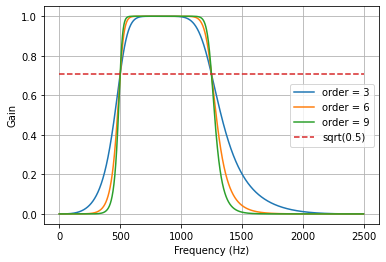

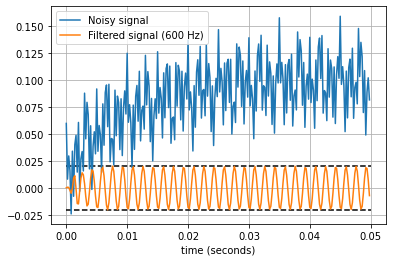

In [ ]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y


def run():
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.signal import freqz

    # Sample rate and desired cutoff frequencies (in Hz).
    fs = 5000.0
    lowcut = 500.0
    highcut = 1250.0

    # Plot the frequency response for a few different orders.
    plt.figure(1)
    plt.clf()
    for order in [3, 6, 9]:
        b, a = butter_bandpass(lowcut, highcut, fs, order=order)
        w, h = freqz(b, a, worN=2000)
        plt.plot((fs * 0.5 / np.pi) * w, abs(h), label="order = %d" % order)

    plt.plot([0, 0.5 * fs], [np.sqrt(0.5), np.sqrt(0.5)],
             '--', label='sqrt(0.5)')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Gain')
    plt.grid(True)
    plt.legend(loc='best')

    # Filter a noisy signal.
    T = 0.05
    nsamples = int(T * fs)
    t = np.linspace(0, T, nsamples, endpoint=False)
    a = 0.02
    f0 = 600.0
    x = 0.1 * np.sin(2 * np.pi * 1.2 * np.sqrt(t))
    x += 0.01 * np.cos(2 * np.pi * 312 * t + 0.1)
    x += a * np.cos(2 * np.pi * f0 * t + .11)
    x += 0.03 * np.cos(2 * np.pi * 2000 * t)
    plt.figure(2)
    plt.clf()
    plt.plot(t, x, label='Noisy signal')

    y = butter_bandpass_filter(x, lowcut, highcut, fs, order=6)
    plt.plot(t, y, label='Filtered signal (%g Hz)' % f0)
    plt.xlabel('time (seconds)')
    plt.hlines([-a, a], 0, T, linestyles='--')
    plt.grid(True)
    plt.axis('tight')
    plt.legend(loc='upper left')

    plt.show()


run()